In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

llama_df = pd.read_csv('results_llama.csv')
gemma_df = pd.read_csv('results_gemma.csv')

# Calculating absolute differences with respect to the "zero-shot" column
# Calculating differences with respect to the "zero-shot" column
for col in llama_df.columns[2:]:  # Starting from the third column, as the first two are 'task' and 'zero-shot'
    llama_df[f'diff_{col}'] = llama_df[col] - llama_df['zero-shot']

for col in gemma_df.columns[2:]:  # Starting from the third column, as the first two are 'task' and 'zero-shot'
    gemma_df[f'diff_{col}'] = gemma_df[col] - gemma_df['zero-shot']

# Dropping original columns to keep only the absolute differences
llama_df_abs_diff = llama_df.drop(llama_df.columns[1:7], axis=1)
gemma_df_abs_diff = gemma_df.drop(gemma_df.columns[1:7], axis=1)

llama_df_abs_diff

,task,diff_knowledge,diff_RAG,diff_fine-tune-zero-shot,diff_fine-tune-knowledge,diff_fine-tune-RAG
0,hayati_politeness,0.156250,0.406250,0.093750,0.156250,NaN
1,contextual-abuse#PersonDirectedAbuse,0.376952,0.079554,0.002230,0.440149,NaN
2,implicit-hate#explicit_hate,0.052000,0.036000,0.049000,0.130500,NaN
3,complaints,0.211594,0.342029,0.124638,0.307246,NaN
4,hypo-l,0.133127,0.287926,0.080495,0.148607,NaN
5,contextual-abuse#IdentityDirectedAbuse,0.439405,0.179182,0.026022,0.520446,NaN
6,offensiveyn,NaN,NaN,NaN,NaN,NaN
7,empathy#distress_bin,0.516129,0.505376,0.123656,0.489247,NaN
8,hasbiasedimplication,0.181000,0.329000,0.145500,0.254000,0.3070
9,rumor#rumor_bool,0.323944,0.605634,0.176056,0.359155,NaN


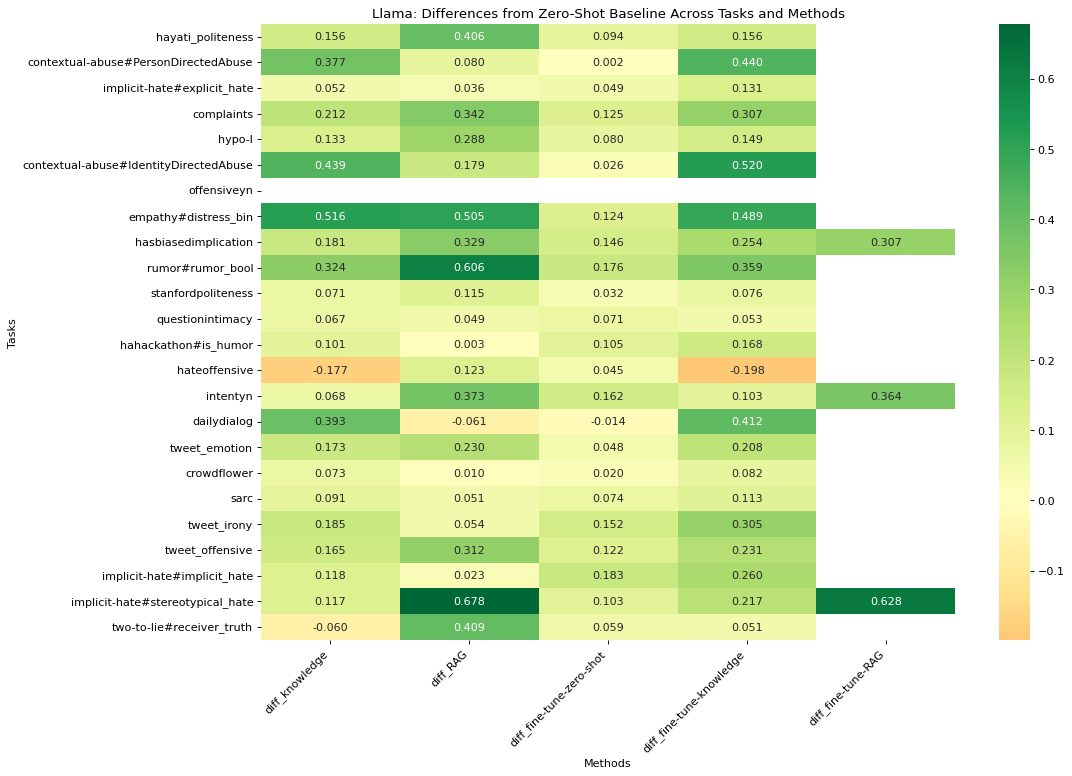

In [9]:
# Setting up the figure size and resolution for the heatmap
plt.figure(figsize=(14, 10), dpi=80)

# Creating the heatmap with annotations to show the difference values
# sns.heatmap(llama_df_abs_diff.drop('task', axis=1).set_index(llama_df_abs_diff['task']), annot=True, fmt=".3f", cmap="coolwarm")
sns.heatmap(llama_df_abs_diff.drop('task', axis=1).set_index(llama_df_abs_diff['task']), annot=True, fmt=".3f", cmap="RdYlGn", center=0)

# Adding title and labels for clarity
plt.title('Llama: Differences from Zero-Shot Baseline Across Tasks and Methods')
plt.xlabel('Methods')
plt.ylabel('Tasks')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the heatmap
plt.show()

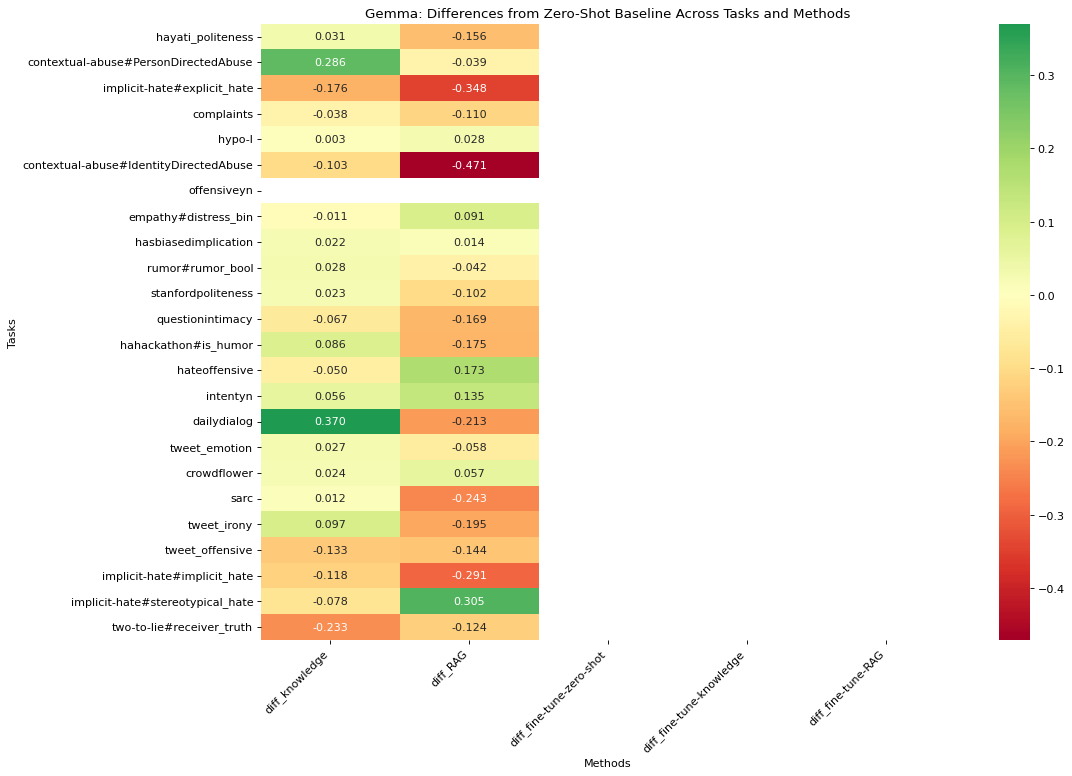

In [8]:
# Setting up the figure size and resolution for the heatmap
plt.figure(figsize=(14, 10), dpi=80)

# Creating the heatmap with annotations to show the difference values
# sns.heatmap(llama_df_abs_diff.drop('task', axis=1).set_index(llama_df_abs_diff['task']), annot=True, fmt=".3f", cmap="coolwarm")
sns.heatmap(gemma_df_abs_diff.drop('task', axis=1).set_index(gemma_df_abs_diff['task']), annot=True, fmt=".3f", cmap="RdYlGn", center=0)

# Adding title and labels for clarity
plt.title('Gemma: Differences from Zero-Shot Baseline Across Tasks and Methods')
plt.xlabel('Methods')
plt.ylabel('Tasks')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the heatmap
plt.show()

/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue`

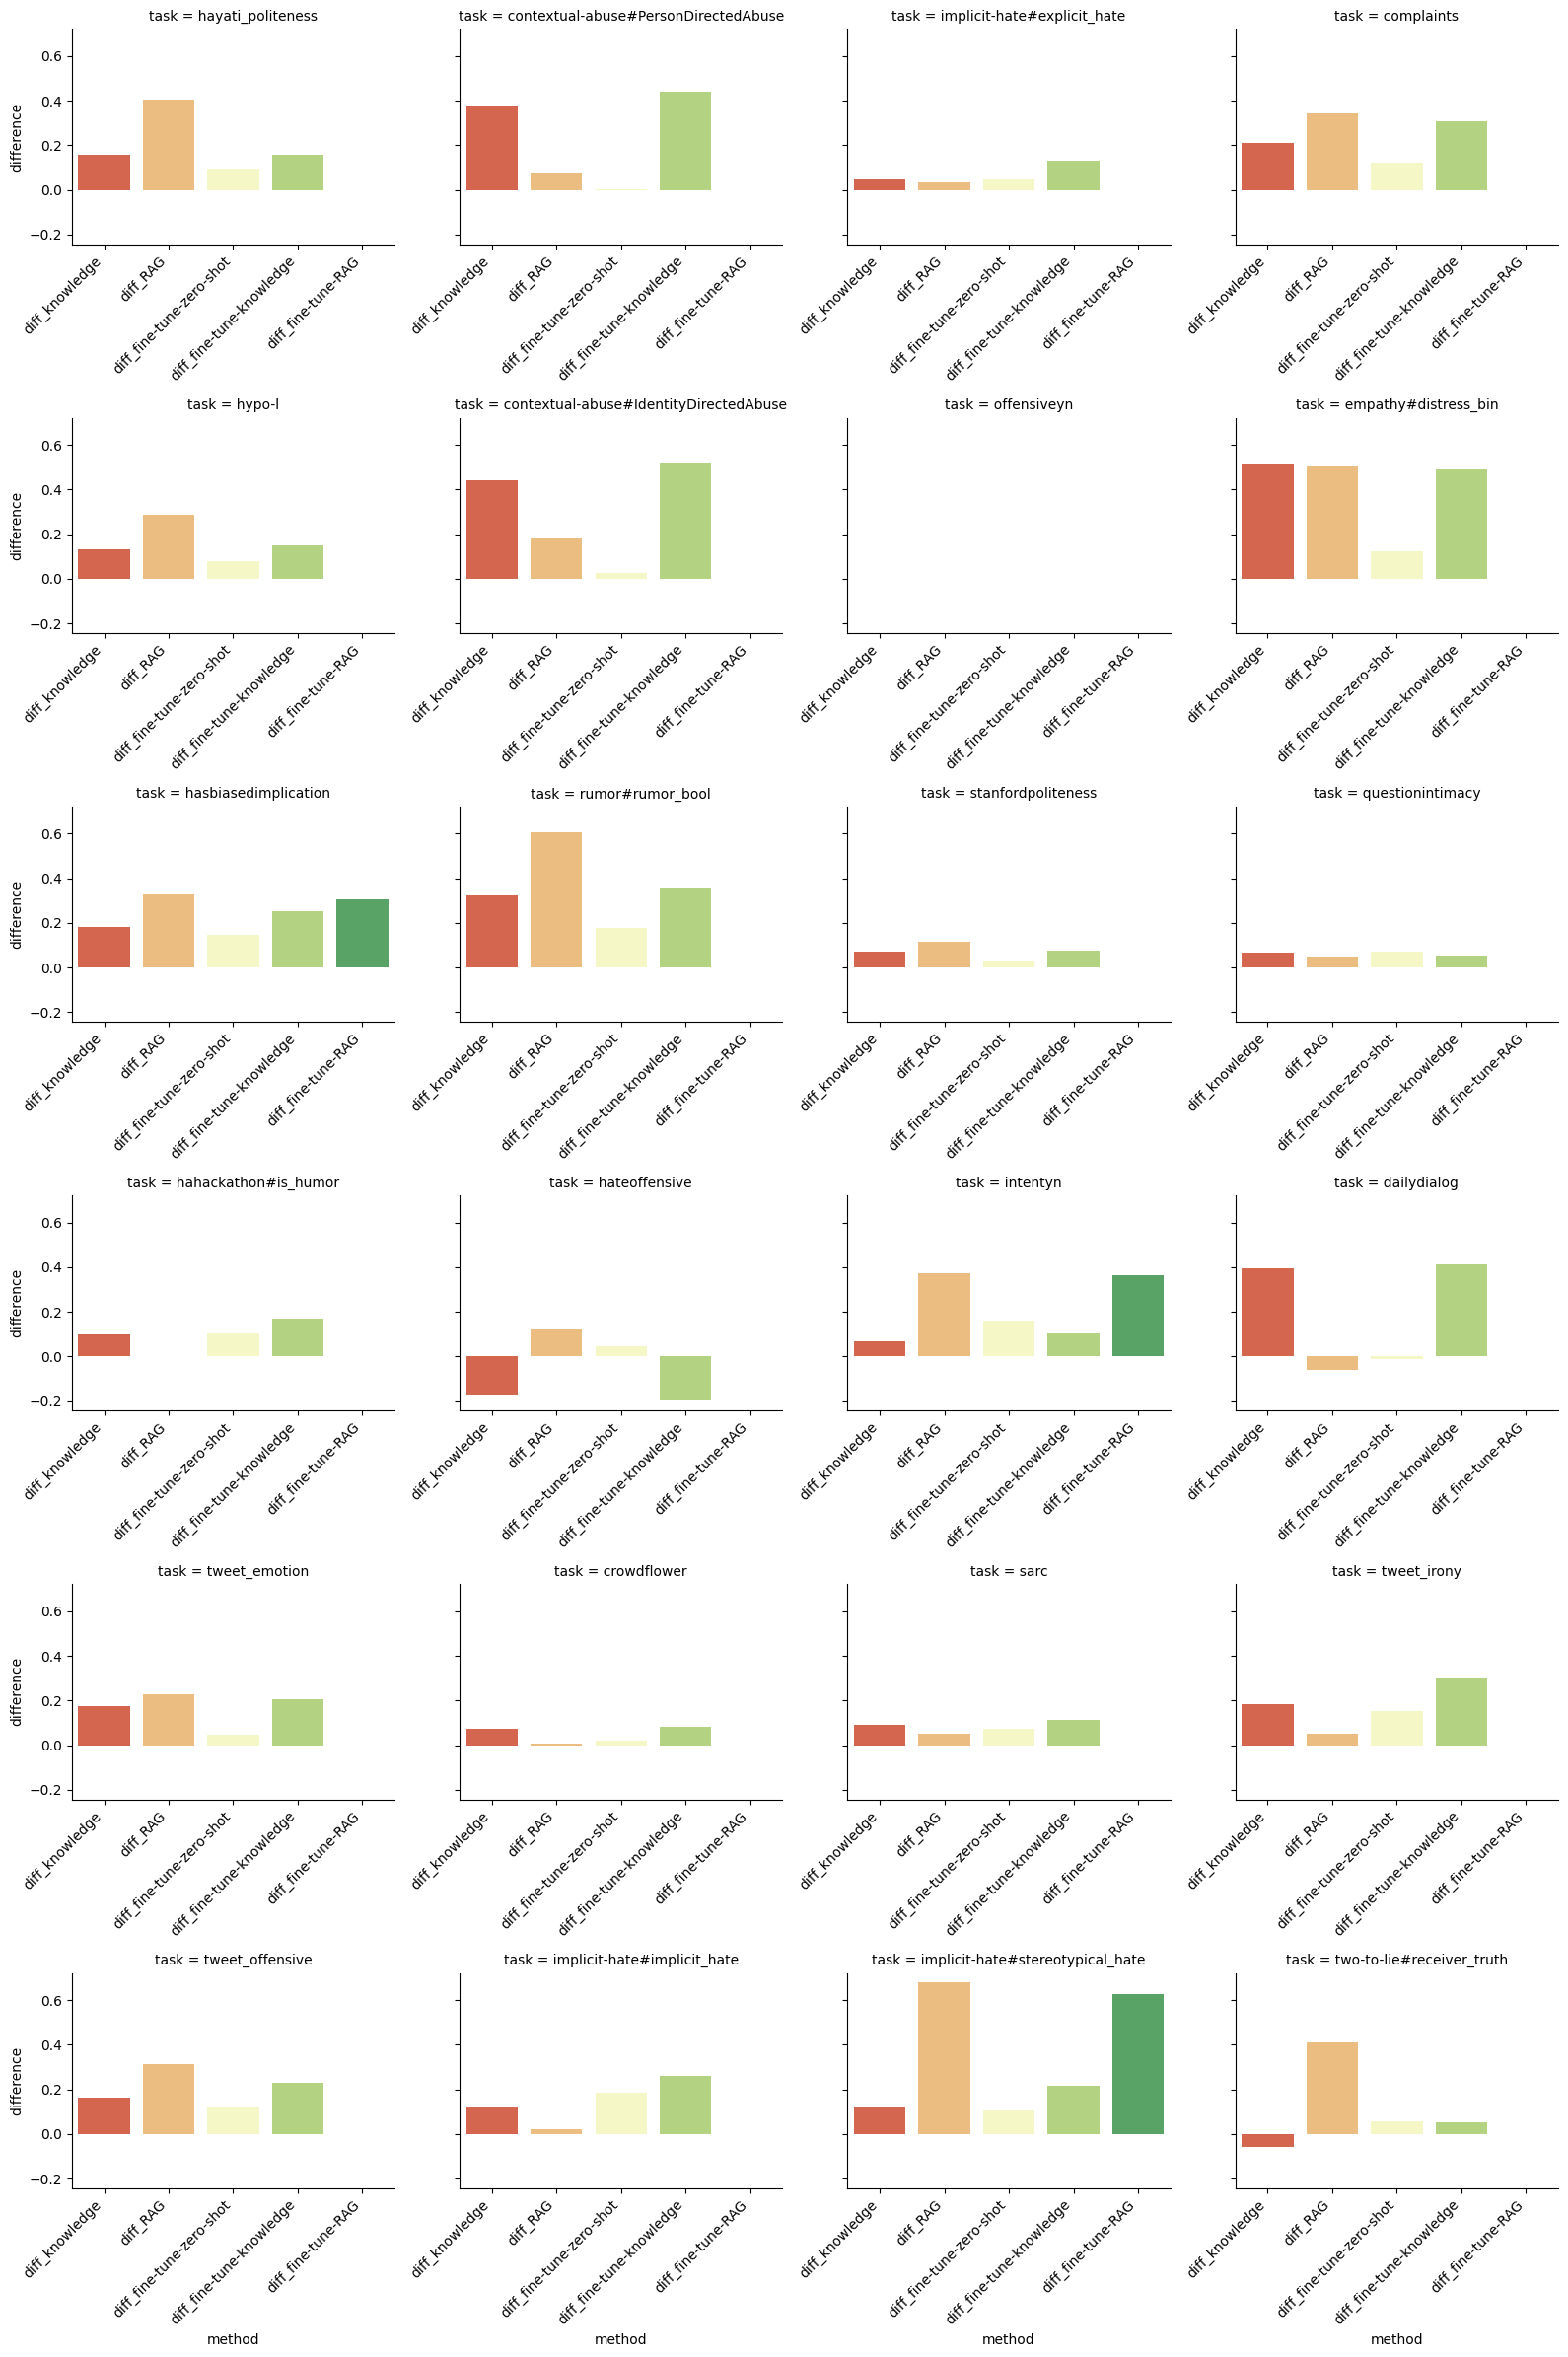

In [10]:
df_melted = llama_df_abs_diff.melt(id_vars='task', var_name='method', value_name='difference')

# Set up the FacetGrid to create a grid of plots
g = sns.FacetGrid(df_melted, col='task', col_wrap=4, sharex=False, sharey=True, height=4)

# Map the barplot to each subplot in the grid
g.map(sns.barplot, 'method', 'difference', palette='RdYlGn')

# Rotate the x-axis labels for readability
g.set_xticklabels(rotation=45, ha='right')

# Adjust the subplots for a cleaner look
g.fig.tight_layout(w_pad=1)

# Display the plots
plt.show()

/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/agmo/projects/social-llama/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue`

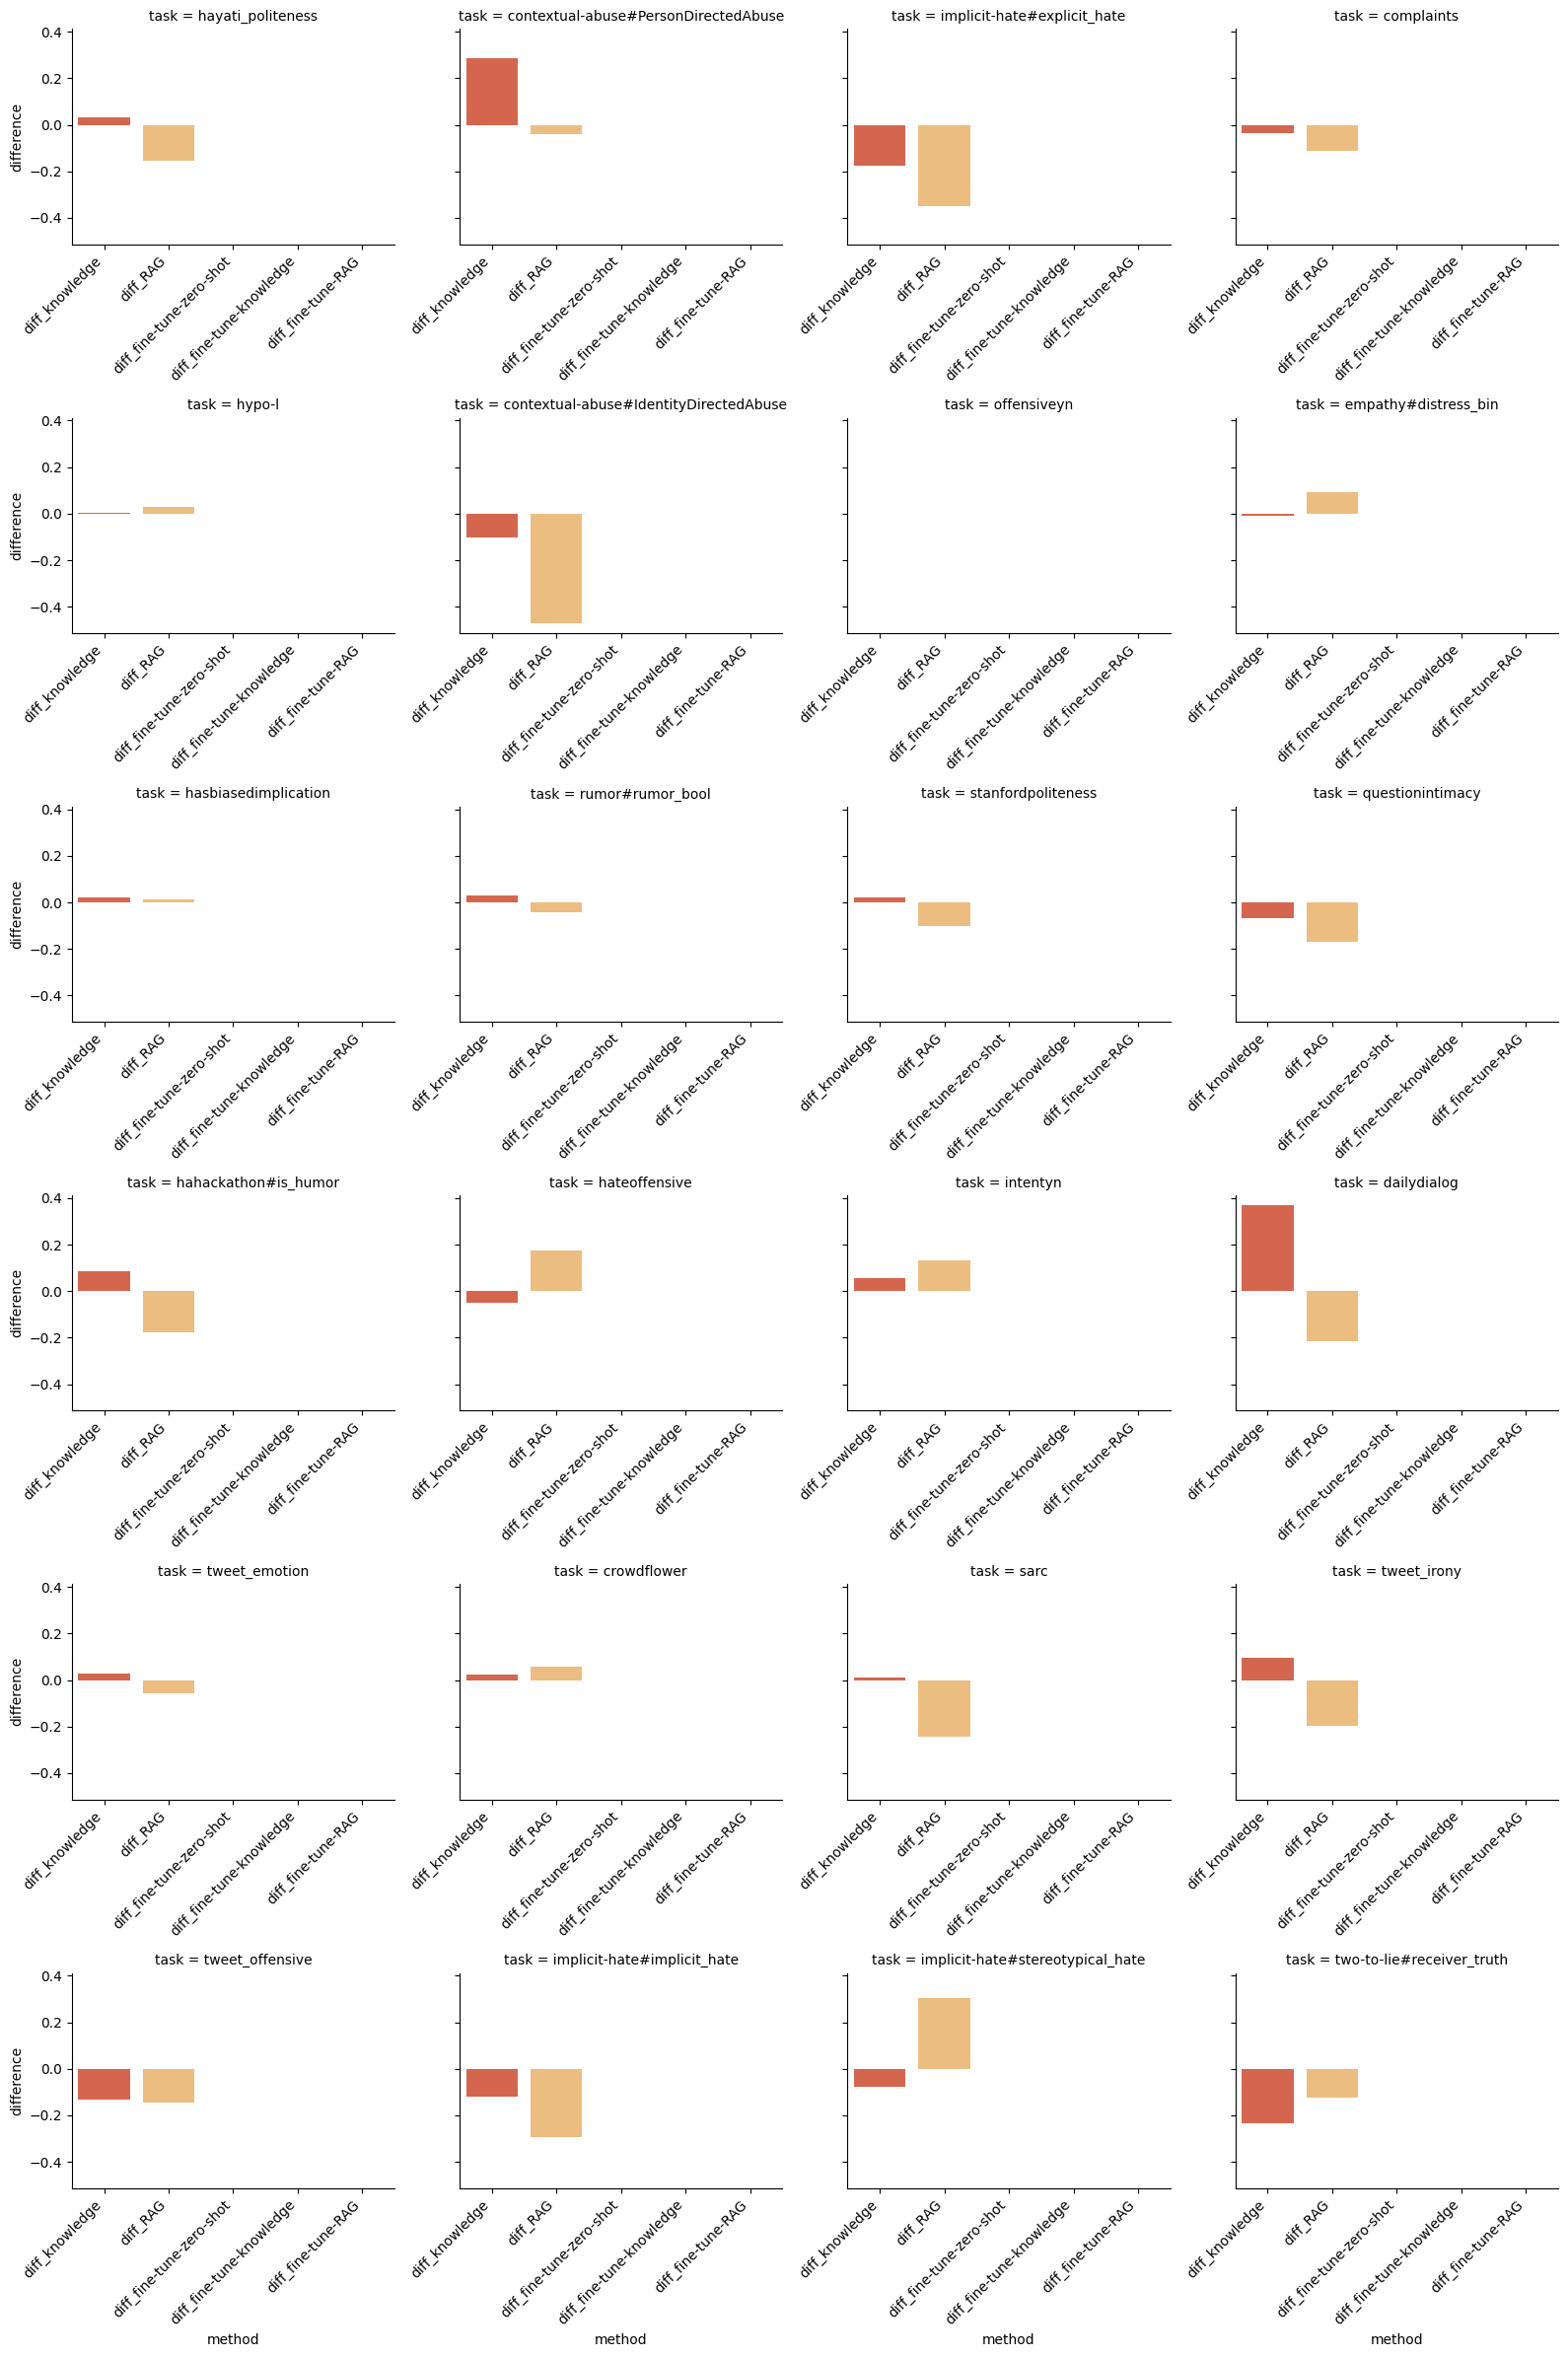

In [11]:
df_melted = gemma_df_abs_diff.melt(id_vars='task', var_name='method', value_name='difference')

# Set up the FacetGrid to create a grid of plots
g = sns.FacetGrid(df_melted, col='task', col_wrap=4, sharex=False, sharey=True, height=4)

# Map the barplot to each subplot in the grid
g.map(sns.barplot, 'method', 'difference', palette='RdYlGn')

# Rotate the x-axis labels for readability
g.set_xticklabels(rotation=45, ha='right')

# Adjust the subplots for a cleaner look
g.fig.tight_layout(w_pad=1)

# Display the plots
plt.show()

In [13]:
llama_df.head()

,task,zero-shot,knowledge,RAG,fine-tune-zero-shot,fine-tune-knowledge,fine-tune-RAG,diff_knowledge,diff_RAG,diff_fine-tune-zero-shot,diff_fine-tune-knowledge,diff_fine-tune-RAG
0,hayati_politeness,0.281250,0.437500,0.687500,0.375000,0.437500,NaN,0.156250,0.406250,0.093750,0.156250,NaN
1,contextual-abuse#PersonDirectedAbuse,0.102602,0.479554,0.182156,0.104833,0.542751,NaN,0.376952,0.079554,0.002230,0.440149,NaN
2,implicit-hate#explicit_hate,0.089500,0.141500,0.125500,0.138500,0.220000,NaN,0.052000,0.036000,0.049000,0.130500,NaN
3,complaints,0.437681,0.649275,0.779710,0.562319,0.744928,NaN,0.211594,0.342029,0.124638,0.307246,NaN
4,hypo-l,0.269350,0.402477,0.557276,0.349845,0.417957,NaN,0.133127,0.287926,0.080495,0.148607,NaN


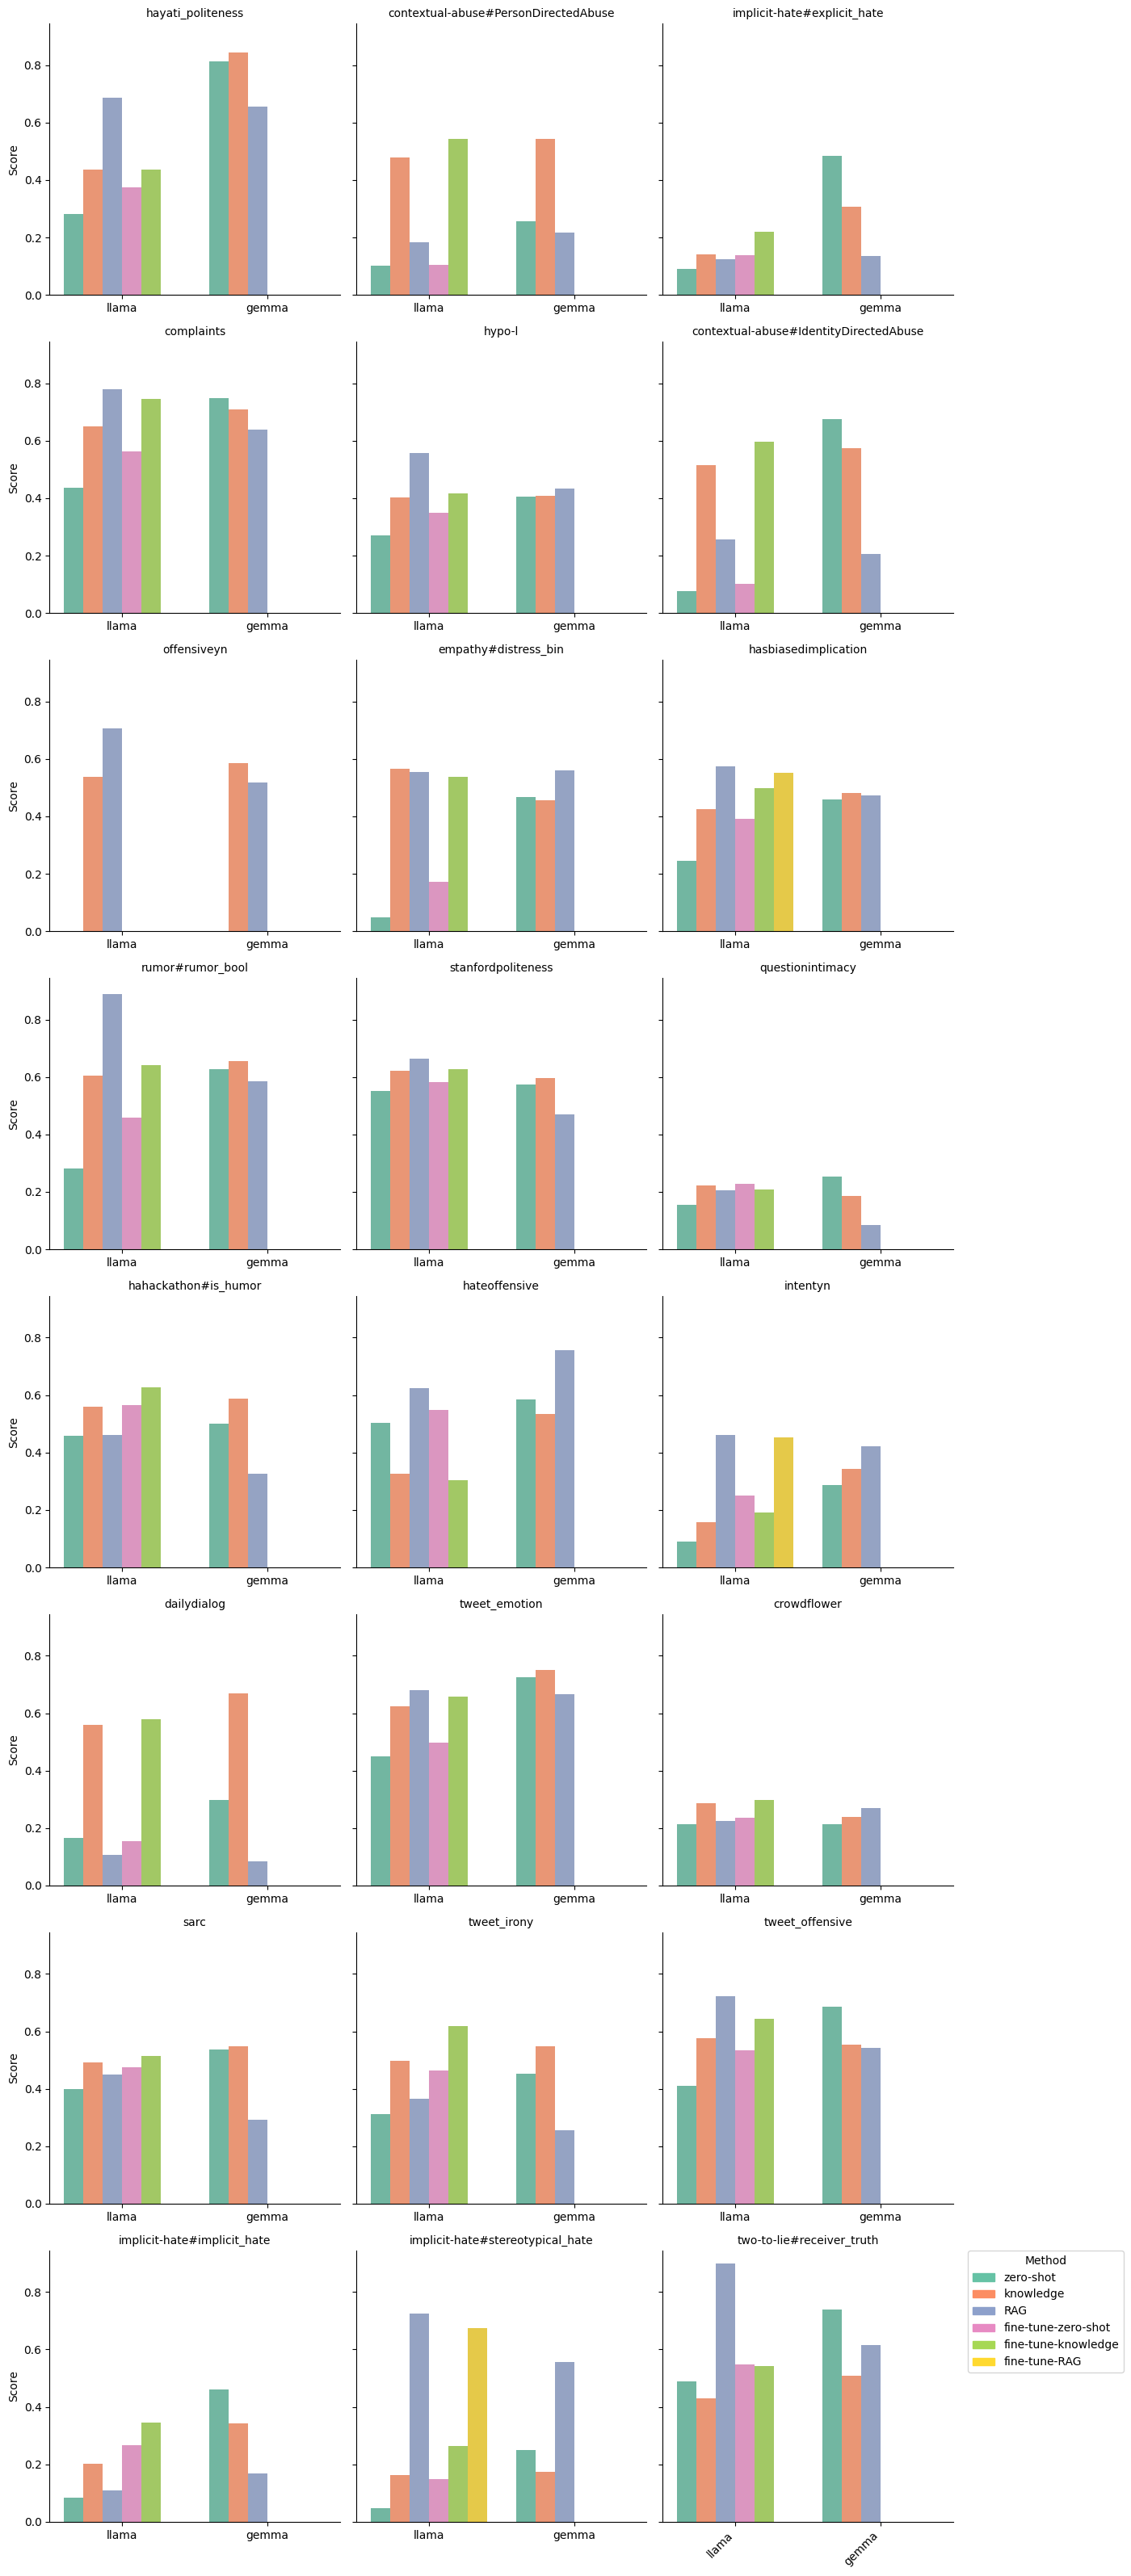

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Step 1: Concatenate the DataFrames with a source identifier
llama_df['source'] = 'llama'
gemma_df['source'] = 'gemma'
combined_df = pd.concat([llama_df, gemma_df])

# Step 2: Filter out the difference columns if they are present
columns_to_keep = ['task', 'source', 'zero-shot', 'knowledge', 'RAG', 'fine-tune-zero-shot', 'fine-tune-knowledge', 'fine-tune-RAG']
combined_df = combined_df[columns_to_keep]

# Step 3: Prepare the data for visualization
# Melt the DataFrame to long format for seaborn plotting
long_df = combined_df.melt(id_vars=['task', 'source'], var_name='method', value_name='score')

# Step 4: Plot the small multiples
# Set up the FacetGrid to create a grid of plots, one for each task
g = sns.FacetGrid(long_df, col='task', col_wrap=3, sharex=False, sharey=True, height=4)

# Map the seaborn barplot to each subplot in the grid
g.map_dataframe(sns.barplot, x='source', y='score', hue='method', palette='Set2')

# Set axis labels and titles
g.set_axis_labels("", "Score")
g.set_titles("{col_name}")

# Adjust the x-axis labels and layout for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Custom Legend Handling
# Create patches for the legend
methods = long_df['method'].unique()
colors = sns.color_palette('Set2', n_colors=len(methods))
patches = [mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)]

# Place the legend outside the last subplot in the grid
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., title='Method')

# Show the plot
plt.show()